In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def random_walk(mean = 0, stdev = 1, iterations = 100, realisations=1):
    return np.cumsum(np.random.normal(mean, stdev, (realisations, iterations)), axis=1)

findfont: Font family ["'URW Bookman L'"] not found. Falling back to DejaVu Sans.


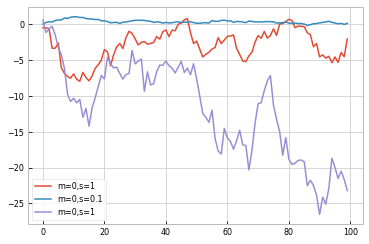

In [3]:
plt.plot(random_walk().T, label="m=0,s=1")
plt.plot(random_walk(mean = 0, stdev=0.1).T, label="m=0,s=0.1")
plt.plot(random_walk(mean = 0, stdev=2).T, label="m=0,s=1")
plt.legend()

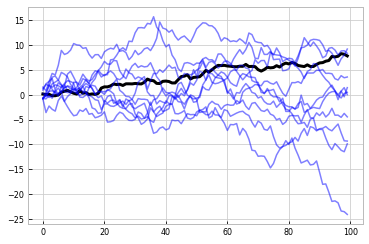

In [4]:
plt.plot(np.mean(random_walk(realisations=10), axis=0), color="k", lw=3);
plt.plot(random_walk(realisations=10).T, color='blue', alpha=0.5);

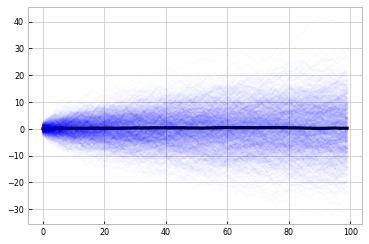

In [5]:
plt.plot(np.mean(random_walk(realisations=1000), axis=0), color="k", lw=3);
plt.plot(random_walk(realisations=1000).T, color='blue', alpha=0.01);

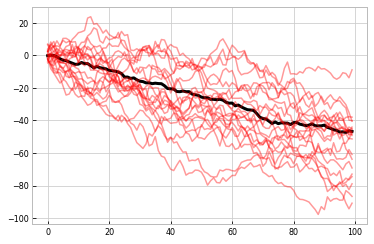

In [6]:
plt.plot(np.mean(random_walk(mean=-0.5, stdev=3, realisations=20), axis=0), color="k", lw=3);
plt.plot(random_walk(mean=-0.5, stdev=3, realisations=20).T, color='red', alpha=0.4);

In [7]:
import scipy.spatial

In [8]:
def exp_q(x, y, length=1):
    """The squared-exponential covariance function"""
    distances = scipy.spatial.distance.cdist(np.expand_dims(x, 1), np.expand_dims(y, 1), "sqeuclidean")
    return np.exp(-0.5 * 1./length * distances)

In [284]:
x = np.linspace(0, 20, 100)
K = exp_q(x,x, length=1)

In [285]:
def gp_prior(x, covariance_function, realisations=1, **covariance_pars):
    K = covariance_function(x,x, **covariance_pars)
    return np.array([np.random.multivariate_normal(mean = 0.4*np.ones(K.shape[0]), cov=K) for i in range(realisations)])

In [286]:
stepState = 0
def gp_prior_samples(x, covariance_function, realisations=1, alpha=0.2, tstep=0.1, mstep=50, **covariance_pars):
    K = covariance_function(x,x, **covariance_pars)
    
    alpha = 1-alpha
    p = []
    z = []
    
    steps = realisations
    for step in range(steps):
        if step == 0:
            initial = np.random.multivariate_normal(mean = 0.4*np.ones(K.shape[0]), cov=K)
            z.append(initial)
            p.append(initial)
        if step % mstep == 0:
            z.append(p[-1])
            
            new_state = alpha*p[-1] + (np.sqrt(1-alpha**2) * np.random.multivariate_normal(mean = 0.4*np.ones(K.shape[0]), cov=K))
            
            p.append(new_state)
        else:
            a = p[-1]
            b = z[-1] 
            c = -1 * z[-1]
            d = p[-1]
            
            z.append((a * np.sin(tstep)) + (b * np.cos(tstep)))
            #outs.append(alpha * outs[-1] + np.sqrt(1-alpha**2) * np.random.multivariate_normal(mean = 0.4*np.ones(K.shape[0]), cov=K))
            p.append((c * np.sin(tstep)) + (d*np.cos(tstep)))

    return np.array(p)

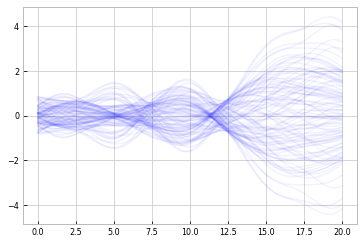

In [287]:
plt.plot(x, gp_prior_samples(x, exp_q, realisations=100, length=5, tstep=0.4, mstep=20).T, color='b', alpha=0.05);

In [471]:
stepState = 0
def gp_posterior_samples(x, data_x, data_y, covariance_function, 
                         realisations=1, alpha=0.2, tstep=0.1, mstep=50, **covariance_pars):

    Kdata = covariance_function(data_x, data_x, **covariance_pars)
    Kdata_inv = np.linalg.inv(Kdata)
    np.dot(Kdata_inv, data_y)
    Kdata_new = covariance_function(data_x, x, **covariance_pars)
    #print(np.dot(Kdata_new.T, Kdata_inv).shape)
    Knew_new = covariance_function(x, x, **covariance_pars)
    mean = np.dot(np.dot(Kdata_new.T, Kdata_inv), data_y)
    variance = Knew_new - np.dot(np.dot(Kdata_new.T, Kdata_inv), Kdata_new)
    
    p = []
    z = []
    
    steps = realisations
    for step in range(steps):
        if step == 0:
            initial = np.random.multivariate_normal(mean = 0.*np.ones(variance.shape[0]), cov=variance)
            z.append(initial)
            p.append(initial)
        if step % mstep == 0:
            new_state = alpha*p[-1] + (np.sqrt(1-alpha**2) * np.random.multivariate_normal(mean = 0.*np.ones(variance.shape[0]), cov=variance))
            
            p.append(new_state)
        else:
            a = z[-1]
            b = p[-1] 
            c = -1 * z[-1]
            d = p[-1]
            
            z.append((a * np.sin(tstep)) + (b * np.cos(tstep)))
            #outs.append(alpha * outs[-1] + np.sqrt(1-alpha**2) * np.random.multivariate_normal(mean = 0.4*np.ones(K.shape[0]), cov=K))
            p.append((c * np.sin(tstep)) + (d * np.cos(tstep)))

    return  mean + np.array(z)

In [472]:
xdata = np.linspace(0, 20, 3)
ydata = np.sin(xdata)

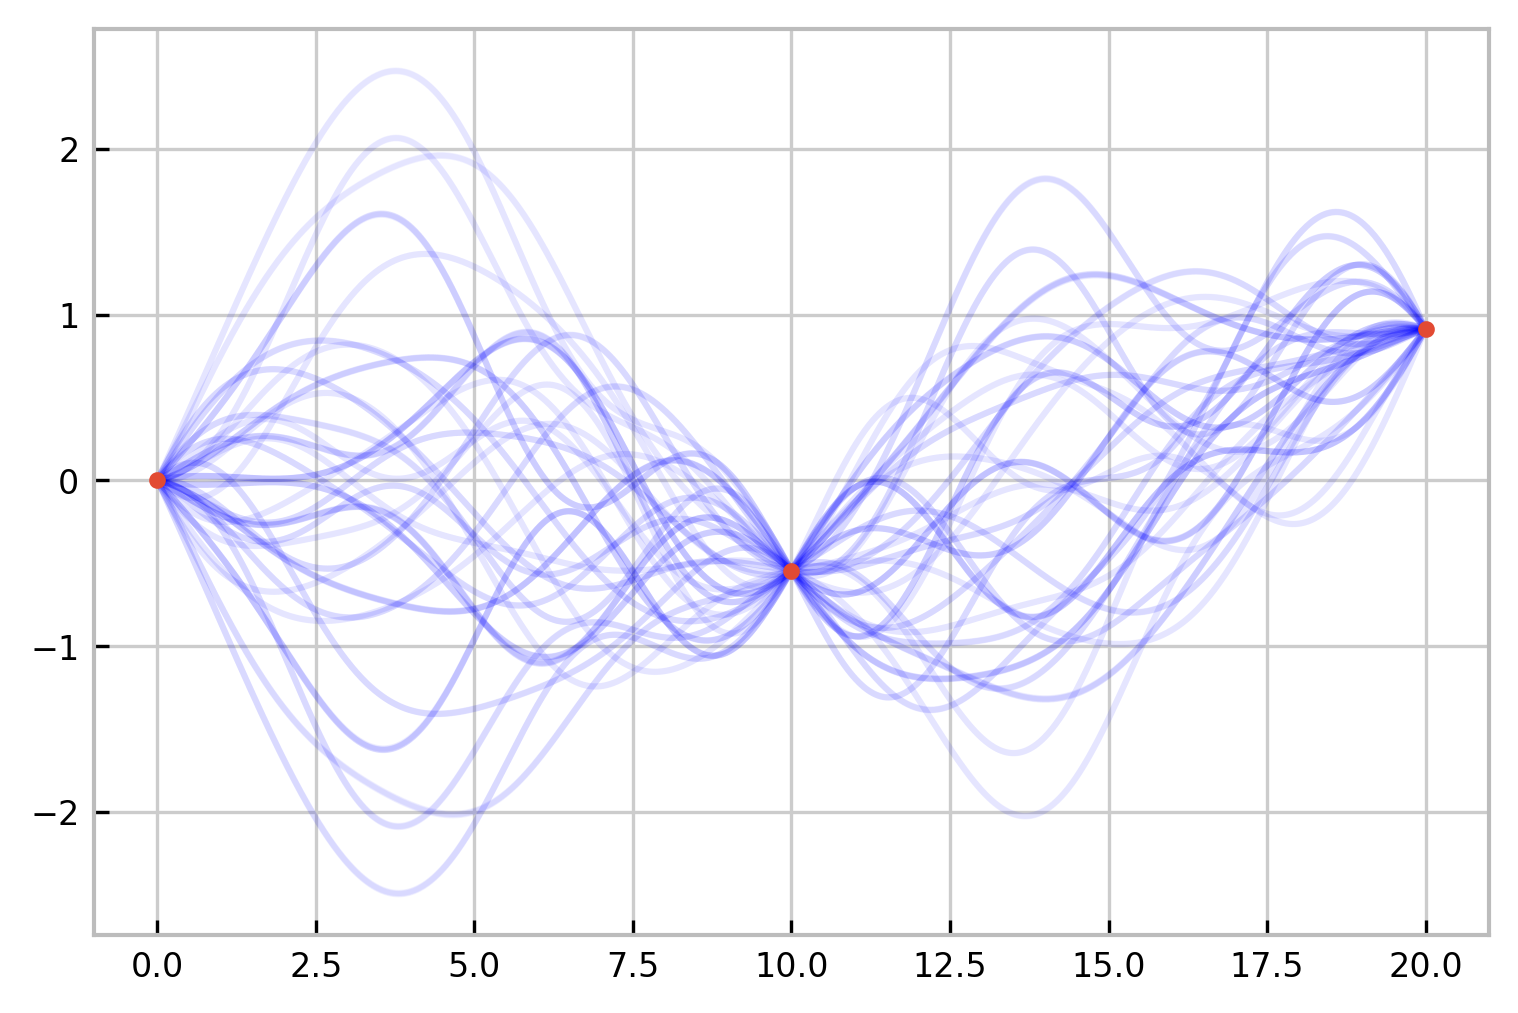

In [473]:
plt.figure(dpi=300)
plt.plot(x, gp_posterior_samples(x, xdata, ydata, exp_q, 
                                 realisations=100, alpha=0.1, length=5, tstep=.8, mstep=20).T, color='b', alpha=0.05);
plt.plot(xdata, ydata, '.')

In [474]:
from matplotlib.animation import FuncAnimation

In [475]:
samples.shape

(1000, 105)

In [521]:
from IPython.display import HTML


x = np.linspace(0, 20, 1000)


samples = []
xs = []
ys = []

for points in range(20):
    xdata = np.linspace(0, points, points)
    ydata = np.sin(xdata)
    xs.append(xdata)
    ys.append(ydata)
    samples.append(gp_posterior_samples(x, xdata, ydata, exp_q, realisations=110, length=2, tstep=0.5, mstep=20).T)

In [522]:
samples = np.hstack(samples)
#xs = np.hstack(xs)
#ys = np.hstack(ys)

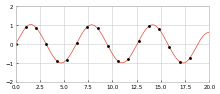

In [523]:
fig = plt.figure(dpi=50, figsize=(5,2))
ax = plt.axes(xlim=(0, 20), ylim=(-2, 2))

line, = ax.plot([], [], lw=1)
points, = ax.plot([], [], '.', c='k')

#ax.plot(xdata, ydata, '.', c='k')

def init():
    line.set_data([], [])
    points.set_data([], [])
    return line,
def animate(i):
    y = samples[:, i]
    points.set_data(xs[int(np.floor(i/110))], ys[int(np.floor(i/110))])
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=2000, interval=30, blit=True)
HTML(anim.to_html5_video())

In [518]:
xs[10]

array([ 0.        ,  2.22222222,  4.44444444,  6.66666667,  8.88888889,
       11.11111111, 13.33333333, 15.55555556, 17.77777778, 20.        ])